### Load the blue (B2), green (B3) and red (B4) bands

In [2]:
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt

# Load Blue (B2), Green (B3) and Red (B4) bands
B2 = tiff.imread('./landsat_c2_l1_sample/LC08_L1TP_009047_20230914_20230919_02_T1_B2.TIF')
B3 = tiff.imread('./landsat_c2_l1_sample/LC08_L1TP_009047_20230914_20230919_02_T1_B3.TIF')
B4 = tiff.imread('./landsat_c2_l1_sample/LC08_L1TP_009047_20230914_20230919_02_T1_B4.TIF')

# Stack and scale bands
RGB = np.dstack((B4, B3, B2))

*In case anyone runs into MemoryError like "MemoryError: Unable to allocate 1.38 GiB for an array with shape (7901, 7801, 3) and data type float64", run garbage collector to delete large variables:*

In [10]:
import gc

del B4
gc.collect()

7

### Large pixel values
To capture as much detail as possible, satellite images have a large dynamic range. As a result, pixel values do not fall into the typical range of [0, 255].

In [3]:
# Print the dimensions
height, width, channels = RGB.shape
print(f"Dimensions of RGB image: Width = {width}, Height = {height}, Channels = {channels}")

# Pixel range
print(f"Pixel range of raw RGB image: ({RGB.min()}, {RGB.max()})")

Dimensions of RGB image: Width = 7541, Height = 7711, Channels = 3
Pixel range of raw RGB image: (0, 64312)


### Surface Reflectance

Landsat Collection 2 surface reflectance has a scale factor of 0.0000275 and an additional offset of -0.2 per pixel. 

For example, a pixel value of 18,639 is multiplied by 0.0000275 for the scale factor and then -0.2 is added for the additional offset to get a reflectance value of 0.313 after the scale factor is applied.
- Reference:
https://www.usgs.gov/faqs/how-do-i-use-a-scale-factor-landsat-level-2-science-products

Pixel range after scaled: (0.0, 1.0)


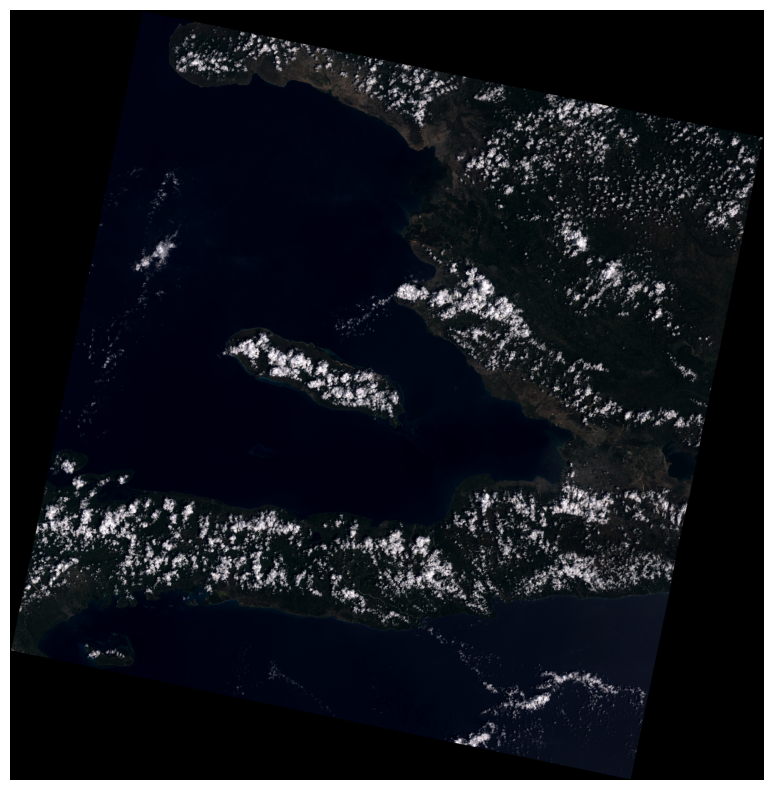

In [4]:
RGB = RGB.astype(np.float32)
RGB = np.clip(RGB*0.0000275-0.2, 0, 1)

print(f"Pixel range after scaled: ({RGB.min()}, {RGB.max()})")

# Display RGB image
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(RGB,  vmin=0, vmax=255)
ax.set_axis_off()

### Brighten the image just for displaying

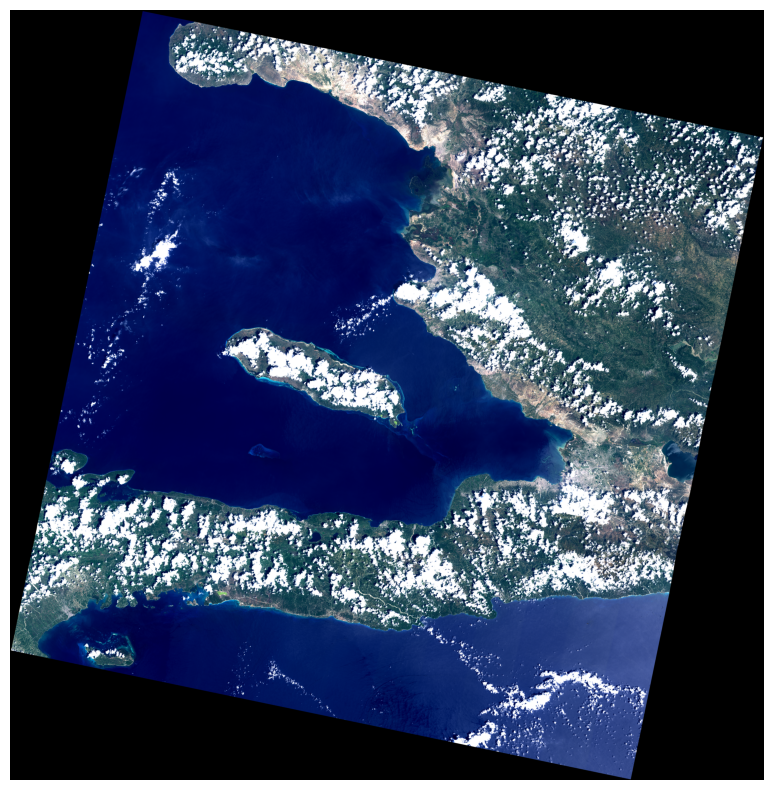

In [5]:
# Clip to enhance contrast
RGB_for_display = np.clip(RGB,0,0.2)/0.2

# Display RGB image
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(RGB_for_display,  vmin=0, vmax=255)
ax.set_axis_off()